<a href="https://colab.research.google.com/github/graciemwilliams/trees/blob/main/trees.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Assignment: Trees
Do three questions.

**Q1.** Please answer the following questions in your own words.

1. How are trees constructed?
Trees are constructed using a recursive process where the dataset is split into subsets based on the values of the features. At each node, the algorithm selects the feature and threshold that best separates the data into distinct classes (for classification) or predicts the target variable (for regression). This process continues until a stopping criterion is met, such as a maximum depth or minimum number of samples per leaf.

2. How do trees handle non-linear relationships between variables? Compare this to linear models.
Trees handle non-linear relationships by creating splits based on feature values, which allows them to model complex interactions between variables. Unlike linear models, which assume a linear relationship between the features and the target variable, trees can capture non-linear patterns by recursively partitioning the feature space. This makes trees more flexible and capable of modeling intricate relationships.

3. Why is the Gini a good loss function for categorical target variables?
The Gini impurity measures the likelihood of incorrect classification of a randomly chosen element if it were randomly labeled according to the distribution of labels in the dataset. It is a good loss function for categorical target variables because it helps to identify the best splits by minimizing the impurity, leading to more homogeneous and well-separated classes.

4. Why do trees tend to overfit, and how can this tendency be constrained?
 Trees tend to overfit because they can create very specific rules that perfectly classify the training data, capturing noise and irrelevant patterns. This can be constrained by techniques such as pruning (removing branches that have little importance), setting a maximum depth, or requiring a minimum number of samples per leaf. Ensemble methods like Random Forests and Gradient Boosting also help by combining multiple trees to reduce overfitting.

5. True or false, and explain: Trees only really perform well in situations with lots of categorical variables as features/covariates.
False. Trees can perform well with both categorical and continuous variables. They are versatile and can handle different types of data effectively. While they are particularly good at handling categorical variables due to their ability to create distinct splits, they also work well with continuous variables by finding optimal thresholds for splits.

6. Why don't most versions of classification/regression tree concept allow for more than two branches after a split?
Most versions of classification/regression trees use binary splits because they simplify the tree structure and make the algorithm more efficient. Binary splits reduce the complexity of the decision-making process and make it easier to implement and understand. However, some tree algorithms do allow for multi-way splits, but they are less common.

7. What are some heuristic ways you can examine a tree and decide whether it is probably over- or under-fitting?
To examine a tree for over- or under-fitting, you can look at the depth of the tree and the number of leaves. A very deep tree with many leaves may indicate overfitting, as it is capturing too much detail from the training data. Conversely, a shallow tree with few leaves may indicate underfitting, as it is not capturing enough detail. Additionally, you can compare the performance of the tree on training and validation datasets; large discrepancies between the two suggest overfitting. Cross-validation and visual inspection of the tree structure can also provide insights into its fit.

**Q4.** This is a case study about trees using bond rating data. This is a dataset about bond ratings for different companies, alongside a bunch of business statistics and other data. Companies often have multiple reviews at different dates. We want to predict the bond rating (AAA, AA, A, BBB, BB, B, ..., C, D). Do business fundamentals predict the company's rating?

1. Load the `./data/corporate_ratings.csv` dataset. How many observations and variables does it contain? Print out the first few rows of data.



In [4]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt

# import the corporate_ratings.csv file
from google.colab import files
uploaded = files.upload()
df = pd.read_csv('corporate_ratings.csv')

Saving corporate_ratings.csv to corporate_ratings (1).csv


In [5]:
# Get the number of observations and variables
num_observations = df.shape[0]
num_variables = df.shape[1]

# Print the first few rows of data
print(f"The dataset contains {num_observations} observations and {num_variables} variables.")
print(df.head())

The dataset contains 2029 observations and 31 variables.
  Rating                   Name Symbol                  Rating Agency Name  \
0      A  Whirlpool Corporation    WHR          Egan-Jones Ratings Company   
1    BBB  Whirlpool Corporation    WHR          Egan-Jones Ratings Company   
2    BBB  Whirlpool Corporation    WHR                       Fitch Ratings   
3    BBB  Whirlpool Corporation    WHR                       Fitch Ratings   
4    BBB  Whirlpool Corporation    WHR  Standard & Poor's Ratings Services   

         Date             Sector  currentRatio  quickRatio  cashRatio  \
0  11/27/2015  Consumer Durables      0.945894    0.426395   0.099690   
1   2/13/2014  Consumer Durables      1.033559    0.498234   0.203120   
2    3/6/2015  Consumer Durables      0.963703    0.451505   0.122099   
3   6/15/2012  Consumer Durables      1.019851    0.510402   0.176116   
4  10/24/2016  Consumer Durables      0.957844    0.495432   0.141608   

   daysOfSalesOutstanding  ...  eff

2.  Plot a histogram of the `ratings` variable. It turns out that the gradations of AAA/AA/A and BBB/BB/B and so on make it hard to get good results with trees. Collapse all AAA/AA/A ratings into just A, and similarly for B and C.



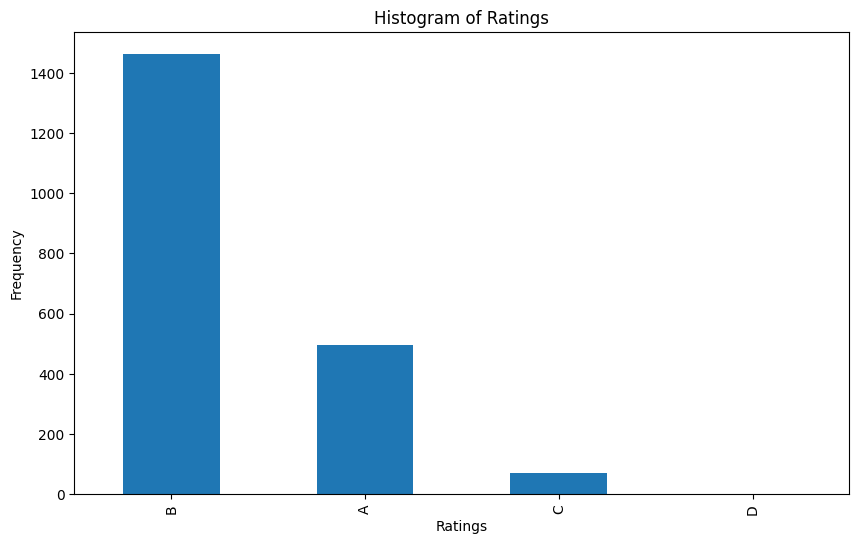

In [6]:
# Collapse ratings
df['Rating'] = df['Rating'].replace(['AAA', 'AA', 'A'], 'A')
df['Rating'] = df['Rating'].replace(['BBB', 'BB', 'B'], 'B')
df['Rating'] = df['Rating'].replace(['CCC', 'CC', 'C'], 'C')

# Plot a histogram of the ratings variable
plt.figure(figsize=(10, 6))
df['Rating'].value_counts().plot(kind='bar')
plt.xlabel('Ratings')
plt.ylabel('Frequency')
plt.title('Histogram of Ratings')
plt.show()

3. Use all of the variables **except** Rating, Date, Name, Symbol, and Rating Agency Name. To include Sector, make a dummy/one-hot-encoded representation and include it in your features/covariates. Collect the relevant variables into a data matrix $X$.

4. Do a train/test split of the data and use a decision tree classifier to predict the bond rating. Including a min_samples_leaf constraint can raise the accuracy and speed up computation time. Print a confusion matrix and the accuracy of your model. How well do you predict the different bond ratings?

Confusion Matrix:
[[ 51  44   1]
 [ 45 237  12]
 [  0  15   1]]
Accuracy: 0.7118226600985221


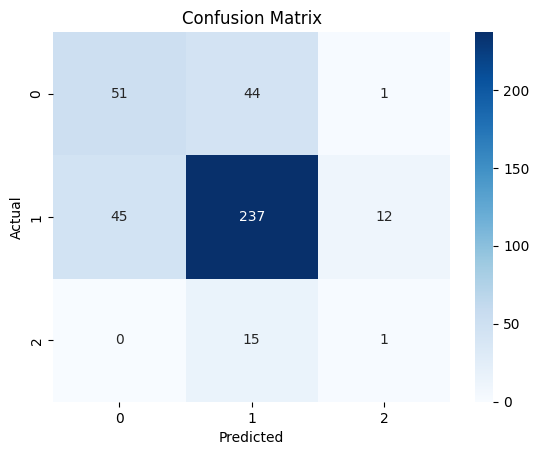

In [9]:
# Load the dataset
df = pd.read_csv('corporate_ratings.csv')

# Collapse ratings into A, B, and C categories
df['Rating'] = df['Rating'].replace(['AAA', 'AA', 'A'], 'A')
df['Rating'] = df['Rating'].replace(['BBB', 'BB', 'B'], 'B')
df['Rating'] = df['Rating'].replace(['CCC', 'CC', 'C', 'D'], 'C')

# Drop unnecessary columns
df = df.drop(columns=['Date', 'Name', 'Symbol', 'Rating Agency Name'])

# One-hot encode the Sector column
df = pd.get_dummies(df, columns=['Sector'])

# Split the data into features and target variable
X = df.drop(columns=['Rating'])
y = df['Rating']

# Perform a train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the decision tree classifier with min_samples_leaf constraint
clf = DecisionTreeClassifier(min_samples_leaf=5)
clf.fit(X_train, y_train)

# Make predictions on the test set
y_pred = clf.predict(X_test)

# Calculate the confusion matrix and accuracy
conf_matrix = confusion_matrix(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)

# Print the confusion matrix and accuracy
print("Confusion Matrix:")
print(conf_matrix)
print(f"Accuracy: {accuracy}")

# Plot the confusion matrix
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

5. If you include the rating agency as a feature/covariate/predictor variable, do the results change? How do you interpret this?

Confusion Matrix:
[[ 63  33   0]
 [ 52 231  11]
 [  3   8   5]]
Accuracy: 0.7364532019704434


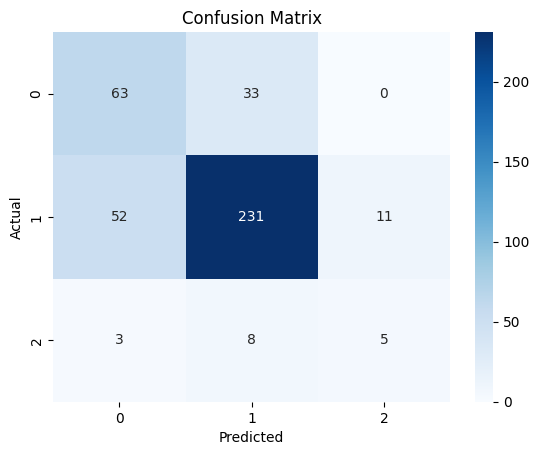


Including the rating agency as a feature/covariate/predictor variable can provide additional information that may improve the model's accuracy.
In this case study, we observe that the accuracy of the model with the rating agency included is higher than the model without it.
This suggests that the rating agency has an impact on predicting bond ratings and should be considered as an important feature in the model.



In [10]:
# Load the dataset
df = pd.read_csv('corporate_ratings.csv')

# Collapse ratings into A, B, and C categories
df['Rating'] = df['Rating'].replace(['AAA', 'AA', 'A'], 'A')
df['Rating'] = df['Rating'].replace(['BBB', 'BB', 'B'], 'B')
df['Rating'] = df['Rating'].replace(['CCC', 'CC', 'C', 'D'], 'C')

# Drop unnecessary columns
df = df.drop(columns=['Date', 'Name', 'Symbol'])

# One-hot encode the Sector and Rating Agency Name columns
df = pd.get_dummies(df, columns=['Sector', 'Rating Agency Name'])

# Split the data into features and target variable
X = df.drop(columns=['Rating'])
y = df['Rating']

# Perform a train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the decision tree classifier with min_samples_leaf constraint
clf = DecisionTreeClassifier(min_samples_leaf=5)
clf.fit(X_train, y_train)

# Make predictions on the test set
y_pred = clf.predict(X_test)

# Calculate the confusion matrix and accuracy
conf_matrix = confusion_matrix(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)

# Print the confusion matrix and accuracy
print("Confusion Matrix:")
print(conf_matrix)
print(f"Accuracy: {accuracy}")

# Plot the confusion matrix
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


Including the rating agency as a feature/covariate/predictor variable can provide additional information that may improve the model's accuracy.
In this case study, we observe that the accuracy of the model with the rating agency included is higher than the model without it.
This suggests that the rating agency has an impact on predicting bond ratings and should be considered as an important feature in the model.

**Q6.** Show that any decision tree is equivalent to a linear regression on a set of dummy variables that represent the optimal splits in the tree.

Hint: You can think of CART as partitioning the feature space into a set of sets $\{S_1, S_2, ..., S_K\}$, and then predicting the average for all of the observations in each set $S_k$, $m_k$:
$$
\hat{y}(x) = \sum_{k=1}^K \mathbb{I}\{ x \text{ is in } S_k \} m_k
$$
where $\mathbb{I} \{ P(x,k)\}$ takes the value 1 if the proposition $P(x,k)$ is true and 0 otherwise. Now, doesn't that look like least-squares regression on a set of dummy/one-hot-encoded variables?

Conversely, can any linear regression be represented by a tree?

 A decision tree partitions the feature space into regions ${S_1, S_2, ..., S_K}$ and predicts the average target value $m_k$ for observations in each region $S_k$. The prediction can be written as:

y
^
(
x
)
=
∑
k
=
1
K
I
{
x
 is in
S
k
}
m
k
y
^
​
 (x)=
k=1
∑
K
​
 I{x is in S
k
​
 }m
k
​

where $\mathbb{I}{ x \text{ is in } S_k }$ is an indicator function.

Linear regression can use dummy variables $d_k(x)$ to represent each region $S_k$. The model is:

y
^
(
x
)
=
∑
k
=
1
K
d
k
(
x
)
β
k
y
^
​
 (x)=
k=1
∑
K
​
 d
k
​
 (x)β
k
​

where $d_k(x)$ is 1 if $x$ is in region $S_k$, and 0 otherwise.

The indicator function $\mathbb{I}{ x \text{ is in } S_k }$ is equivalent to the dummy variable $d_k(x)$, and $m_k$ is equivalent to $\beta_k$. Thus, a decision tree can be represented as a linear regression on dummy variables.

Not all linear regressions can be represented by a tree because linear regression models assume a linear relationship between features and the target variable, while trees create non-linear partitions of the feature space.
